In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ls /content/gdrive

MyDrive


In [ ]:
!ls /content/gdrive/MyDrive/RecogSign/

Annotations  model.f5.data-00000-of-00001  Resized    train.txt
backup	     model.f5.index		   Test       val.txt
checkpoint   model.json			   Test.csv   YOLO_Format
Meta	     NewPreprocessed		   Train
Meta.csv     Preprocessed		   Train.csv


In [ ]:
!ls /content/gdrive/MyDrive/RecogSign/NewPreprocessed/

0  1  2  3  4  5  6  7


In [ ]:
#imports

import numpy as np
import pandas as pd


import PIL
from PIL import Image
import cv2

import matplotlib.pyplot as plt


import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import warnings

warnings.filterwarnings("ignore")

In [ ]:
## load data

total_classes = 8  # preprocessed classes

TRAIN_PATH='/content/gdrive/MyDrive/RecogSign/NewPreprocessed'

image_data = []
image_labels = []

height = 32
width = 32
channels = 3

00000_00003_00016.png


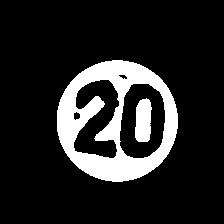

00000_00002_00024.png


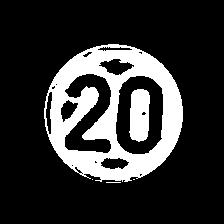

In [ ]:
# viewing random images of class 0
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab.patches import cv2_imshow #substitute for colab

dir_path_temp = TRAIN_PATH + '/0/'
images_in_path = os.listdir(dir_path_temp)

# select images
n_images = 2
import random
new_img_list = random.sample(images_in_path, n_images)

for path_temp in new_img_list:
  print(path_temp)
  img_temp = cv2.imread(dir_path_temp + path_temp) 
  cv2_imshow(img_temp)

00001_00025_00028.png


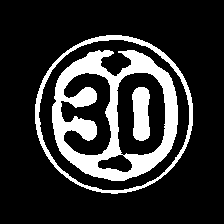

00001_00069_00022.png


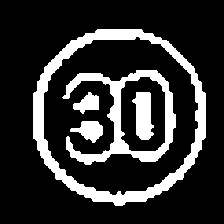

In [ ]:
# viewing random images of class 1
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab.patches import cv2_imshow #substitute for colab

dir_path_temp = TRAIN_PATH + '/1/'
images_in_path = os.listdir(dir_path_temp)

# select images
n_images = 2
import random
new_img_list = random.sample(images_in_path, n_images)

for path_temp in new_img_list:
  print(path_temp)
  img_temp = cv2.imread(dir_path_temp + path_temp) 
  cv2_imshow(img_temp)

In [ ]:
img_temp = cv2.imread(dir_path_temp + path_temp)
cv2_imshow(img_temp) 
print(img_temp.shape)

print(img_temp)

image_fromarray = Image.fromarray(img_temp)
print(image_fromarray)
resize_image = image_fromarray.resize((height, width))
print(resize_image)

In [ ]:
for i in range(total_classes):
    path = TRAIN_PATH + '/' + str(i)
    print(f"Input directory {i}: {path}")
    images = os.listdir(path)
    print(f"Images: {images[:5]}")
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image)
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            # print("Error in Image loading")
            print("Error")
            break
    # print(f"Done loading {i} folder")  
 
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

Input directory 0: /content/gdrive/MyDrive/RecogSign/NewPreprocessed/0
Images: ['00000_00000_00000.png', '00000_00000_00002.png', '00000_00000_00004.png', '00000_00000_00003.png', '00000_00000_00008.png']
Input directory 1: /content/gdrive/MyDrive/RecogSign/NewPreprocessed/1
Images: ['00001_00035_00024.png', '00001_00035_00025.png', '00001_00035_00026.png', '00001_00035_00028.png', '00001_00035_00027.png']
Input directory 2: /content/gdrive/MyDrive/RecogSign/NewPreprocessed/2
Images: ['00002_00033_00027.png', '00002_00033_00028.png', '00002_00033_00029.png', '00002_00034_00002.png', '00002_00034_00003.png']
Input directory 3: /content/gdrive/MyDrive/RecogSign/NewPreprocessed/3
Images: ['00003_00004_00015.png', '00003_00004_00016.png', '00003_00004_00017.png', '00003_00004_00019.png', '00003_00004_00018.png']
Input directory 4: /content/gdrive/MyDrive/RecogSign/NewPreprocessed/4
Images: ['00004_00025_00025.png', '00004_00025_00026.png', '00004_00025_00027.png', '00004_00025_00028.png', 

In [ ]:
print(len(image_data))
print(len(image_labels))

10175
10175


In [ ]:
print(image_data[0].shape)

(32, 32, 3)


In [ ]:
# Shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
## splitting into train and validation
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.1)

In [ ]:
# shapes of train, test
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (9157, 32, 32, 3)
Shape of x_test: (1018, 32, 32, 3)
Shape of y_train: (9157,)
Shape of y_test: (1018,)


In [ ]:
## convert labels - one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_test = keras.utils.to_categorical(y_test, total_classes)

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (9157, 8)
Shape of y_test: (1018, 8)


In [ ]:
np.random.seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=18, kernel_size=(5,5), strides=1, activation="relu", 
                        input_shape=(height, width, channels)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5,5), strides=1, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=36, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(1,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=72, activation="relu"),
    keras.layers.Dense(units=8, activation="softmax"),
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 18)        1368      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 36)        16236     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 36)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 36)          32436     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 36)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36)               

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 20
validation_data = (x_test, y_test)
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
287/287 [==============================] - 11s 37ms/step - loss: 6.3136 - accuracy: 0.3226 - val_loss: 0.6621 - val_accuracy: 0.7839
Epoch 2/20
287/287 [==============================] - 10s 36ms/step - loss: 0.5454 - accuracy: 0.8219 - val_loss: 0.2778 - val_accuracy: 0.9175
Epoch 3/20
287/287 [==============================] - 10s 36ms/step - loss: 0.2285 - accuracy: 0.9275 - val_loss: 0.3131 - val_accuracy: 0.9018
Epoch 4/20
287/287 [==============================] - 10s 36ms/step - loss: 0.1554 - accuracy: 0.9467 - val_loss: 0.2274 - val_accuracy: 0.9411
Epoch 5/20
287/287 [==============================] - 10s 36ms/step - loss: 0.1139 - accuracy: 0.9635 - val_loss: 0.2273 - val_accuracy: 0.9332
Epoch 6/20
287/287 [==============================] - 10s 36ms/step - loss: 0.0858 - accuracy: 0.9717 - val_loss: 0.1640 - val_accuracy: 0.9499
Epoch 7/20
287/287 [==============================] - 10s 36ms/step - loss: 0.0799 - accuracy: 0.9724 - val_loss: 0.1579 - val_accuracy:

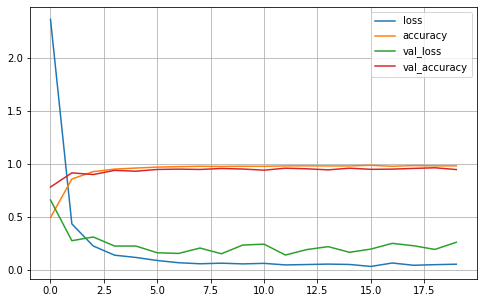

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
path = '/content/gdrive/MyDrive/RecogSign/Test/PP_Test/'
test_images = os.listdir(path)
print(len(test_images))
print(test_images)

152
['00014.png', '00013.png', '00011.png', '00023.png', '00020.png', '00030.png', '00034.png', '00036.png', '00046.png', '00049.png', '00040.png', '00056.png', '00062.png', '00068.png', '00067.png', '00086.png', '00083.png', '00074.png', '00087.png', '00092.png', '00096.png', '00105.png', '00115.png', '00121.png', '00123.png', '00122.png', '00124.png', '00138.png', '00141.png', '00150.png', '00146.png', '00162.png', '00155.png', '00159.png', '00176.png', '00179.png', '00175.png', '00180.png', '00187.png', '00181.png', '00189.png', '00195.png', '00206.png', '00202.png', '00203.png', '00213.png', '00217.png', '00218.png', '00220.png', '00221.png', '00222.png', '00223.png', '00228.png', '00227.png', '00238.png', '00246.png', '00243.png', '00247.png', '00264.png', '00252.png', '00268.png', '00279.png', '00285.png', '00284.png', '00301.png', '00295.png', '00302.png', '00307.png', '00319.png', '00316.png', '00320.png', '00321.png', '00322.png', '00328.png', '00338.png', '00329.png', '00330.

In [ ]:
TEST_CSV_PATH = '/content/gdrive/MyDrive/RecogSign/Test.csv'
test_df = pd.read_csv(TEST_CSV_PATH)
test_df = test_df.drop(labels=['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis=1)

# removing "Test/" from df values
test_df['Path'] = test_df['Path'].str[5:]
test_df

,ClassId,Path
0,16,00000.png
1,1,00001.png
2,38,00002.png
3,33,00003.png
4,11,00004.png
...,...,...
12625,12,12625.png
12626,33,12626.png
12627,6,12627.png
12628,7,12628.png


In [ ]:
#dropping rows that aren't in our test set
for index, item in test_df.iterrows():
  if item[1] not in test_images:
    test_df = test_df.drop(index)

In [ ]:
print(len(test_df))

152


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 12565
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  152 non-null    int64 
 1   Path     152 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [ ]:
#change class ID 7 to 6 and 8 to 7 (as per our convention)
# test_df = test_df.replace(to_replace=7, value=6)
# test_df = test_df.replace(to_replace=8, value=7)

In [ ]:
test_df

,ClassId,Path
1,1,00001.png
11,6,00011.png
13,6,00013.png
14,4,00014.png
20,4,00020.png
...,...,...
11873,0,11873.png
12272,4,12272.png
12273,7,12273.png
12442,3,12442.png


In [3]:
classes = {
    0: 'Speed limit 20',
    1: 'Speed limit 30',
    2: 'Speed limit 50',
    3: 'Speed limit 60',
    4: 'Speed limit 70',
    5: 'Speed limit 80',
    6: 'Speed limit 100',
    7: 'Speed limit 120'
}

In [ ]:
labels = test_df['ClassId'].values
imgs = test_df["Path"].values

test_data = []

for img_temp in imgs:
    try:
        image = cv2.imread('/content/gdrive/MyDrive/RecogSign/Test/PP_Test/' + img_temp)
        image_fromarray = Image.fromarray(image)
        resize_image = image_fromarray.resize((height, width))
        test_data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(test_data)

In [ ]:
pred = model.predict_classes(X_test)

#Accuracy with the test data
print("Accuracy: ", accuracy_score(labels, pred))

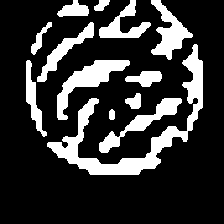

Image: 00014.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


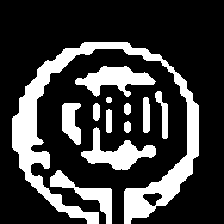

Image: 00013.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


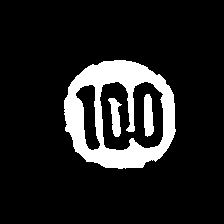

Image: 00011.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


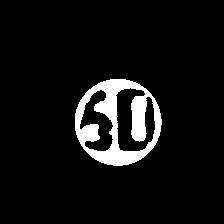

Image: 00023.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


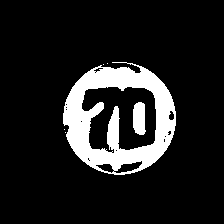

Image: 00020.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


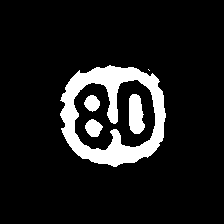

Image: 00030.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


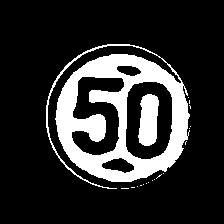

Image: 00034.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


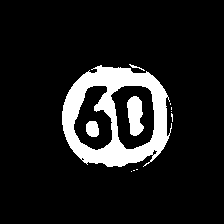

Image: 00036.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


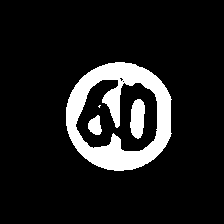

Image: 00046.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


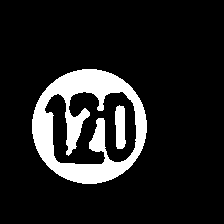

Image: 00049.png, Prediction: 5, Class: Speed limit 80
Actual Class: 7, Speed limit 120
N


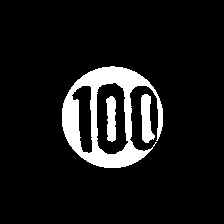

Image: 00040.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


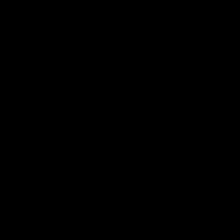

Image: 00056.png, Prediction: 4, Class: Speed limit 70
Actual Class: 5, Speed limit 80
N


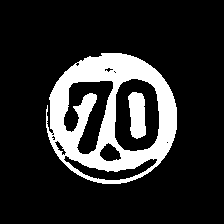

Image: 00062.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


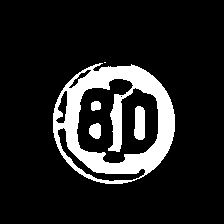

Image: 00068.png, Prediction: 1, Class: Speed limit 30
Actual Class: 5, Speed limit 80
N


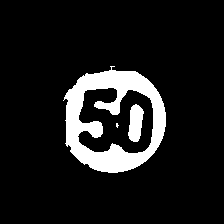

Image: 00067.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


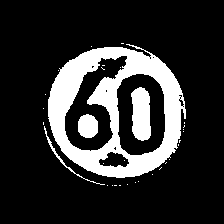

Image: 00086.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


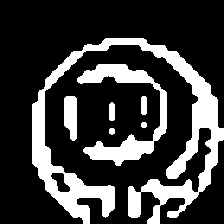

Image: 00083.png, Prediction: 7, Class: Speed limit 120
Actual Class: 6, Speed limit 100
N


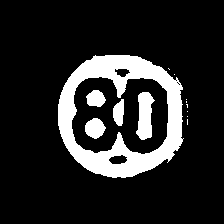

Image: 00074.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


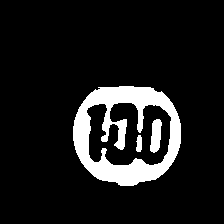

Image: 00087.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


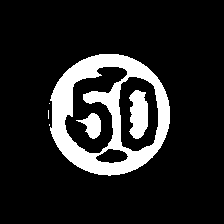

Image: 00092.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


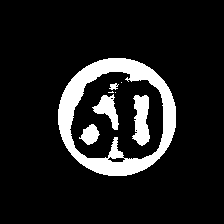

Image: 00096.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


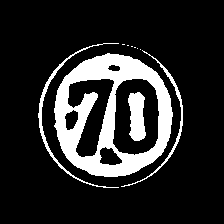

Image: 00105.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


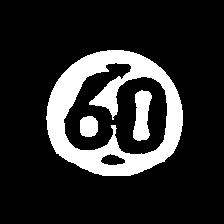

Image: 00115.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


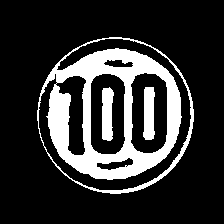

Image: 00121.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


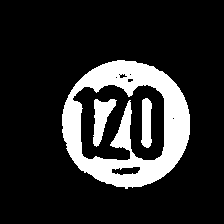

Image: 00123.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


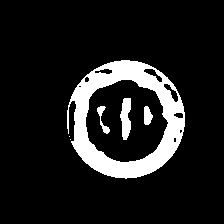

Image: 00122.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30
N


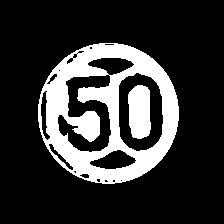

Image: 00124.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


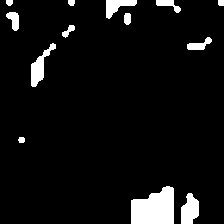

Image: 00138.png, Prediction: 1, Class: Speed limit 30
Actual Class: 2, Speed limit 50
N


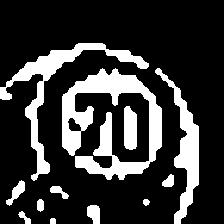

Image: 00141.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


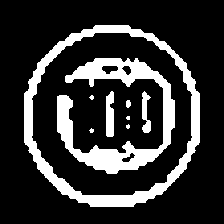

Image: 00150.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


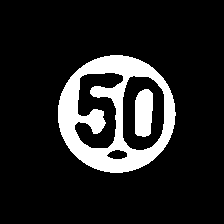

Image: 00146.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


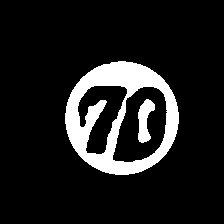

Image: 00162.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


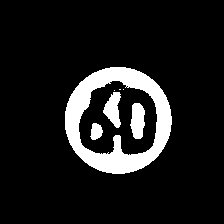

Image: 00155.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


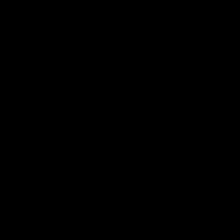

Image: 00159.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


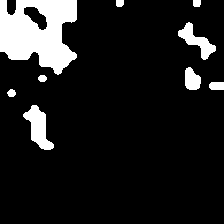

Image: 00176.png, Prediction: 7, Class: Speed limit 120
Actual Class: 3, Speed limit 60
N


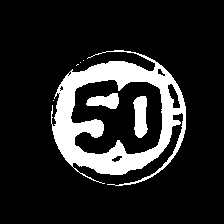

Image: 00179.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


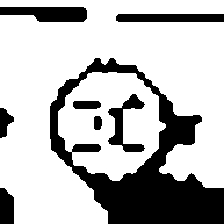

Image: 00175.png, Prediction: 5, Class: Speed limit 80
Actual Class: 1, Speed limit 30
N


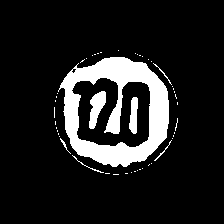

Image: 00180.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


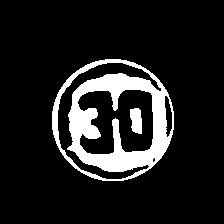

Image: 00187.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


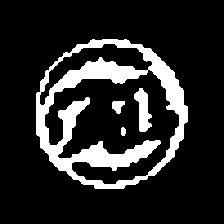

Image: 00181.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


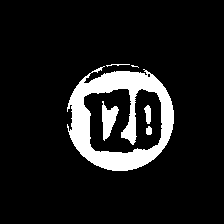

Image: 00189.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


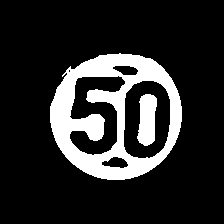

Image: 00195.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


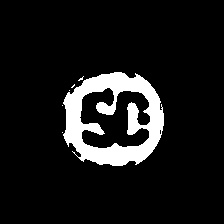

Image: 00206.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


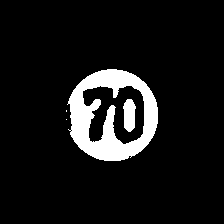

Image: 00202.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


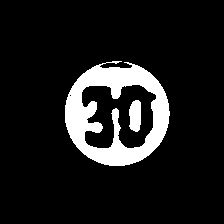

Image: 00203.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


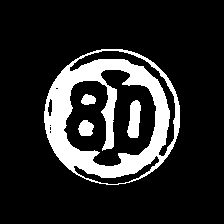

Image: 00213.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


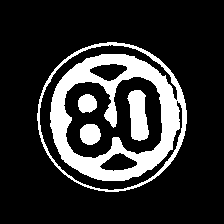

Image: 00217.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


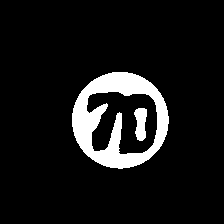

Image: 00218.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


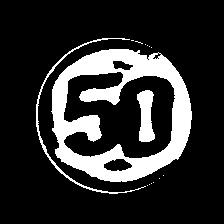

Image: 00220.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


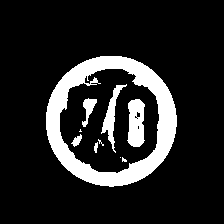

Image: 00221.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


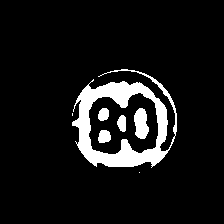

Image: 00222.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


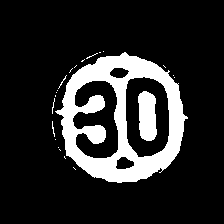

Image: 00223.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


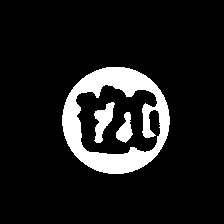

Image: 00228.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


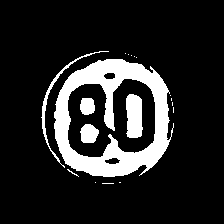

Image: 00227.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


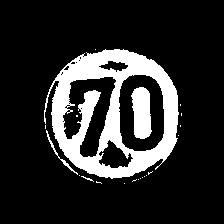

Image: 00238.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


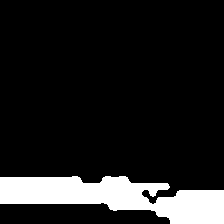

Image: 00246.png, Prediction: 6, Class: Speed limit 100
Actual Class: 5, Speed limit 80
N


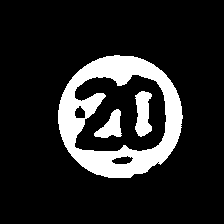

Image: 00243.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


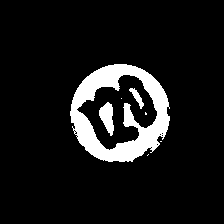

Image: 00247.png, Prediction: 5, Class: Speed limit 80
Actual Class: 7, Speed limit 120
N


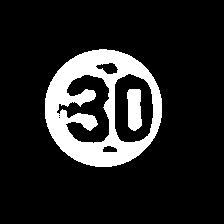

Image: 00264.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


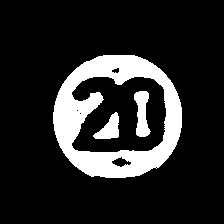

Image: 00252.png, Prediction: 5, Class: Speed limit 80
Actual Class: 0, Speed limit 20
N


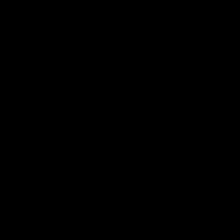

Image: 00268.png, Prediction: 4, Class: Speed limit 70
Actual Class: 2, Speed limit 50
N


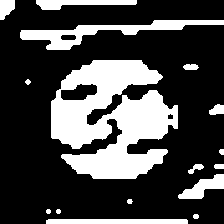

Image: 00279.png, Prediction: 6, Class: Speed limit 100
Actual Class: 1, Speed limit 30
N


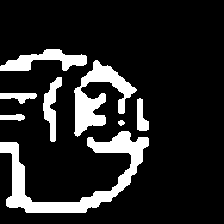

Image: 00285.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


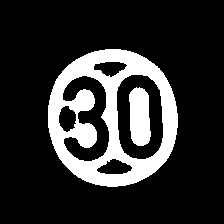

Image: 00284.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


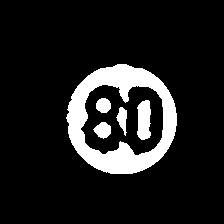

Image: 00301.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


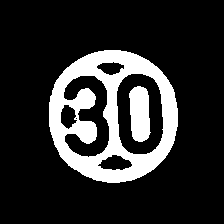

Image: 00295.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


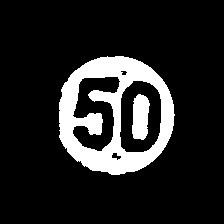

Image: 00302.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


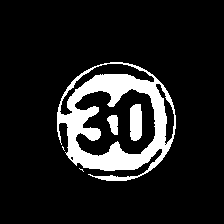

Image: 00307.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


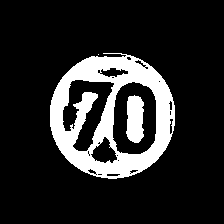

Image: 00319.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


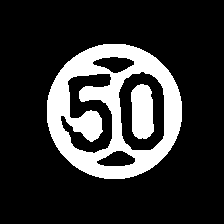

Image: 00316.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


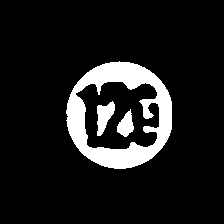

Image: 00320.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


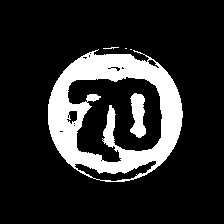

Image: 00321.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


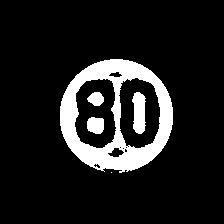

Image: 00322.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


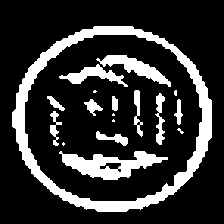

Image: 00328.png, Prediction: 6, Class: Speed limit 100
Actual Class: 7, Speed limit 120
N


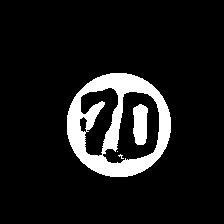

Image: 00338.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


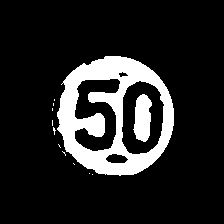

Image: 00329.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


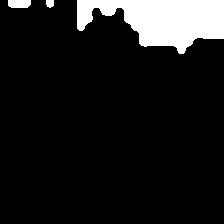

Image: 00330.png, Prediction: 3, Class: Speed limit 60
Actual Class: 4, Speed limit 70
N


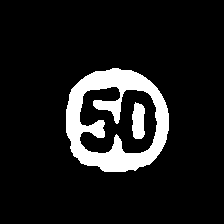

Image: 00343.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


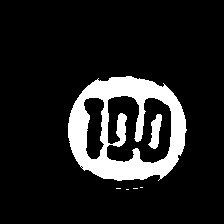

Image: 00347.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


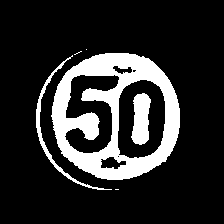

Image: 00351.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


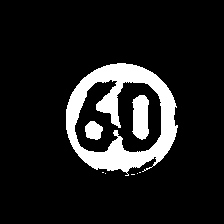

Image: 00357.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


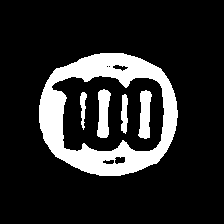

Image: 00366.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


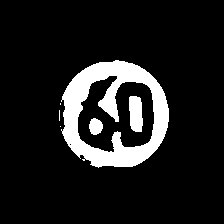

Image: 00364.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


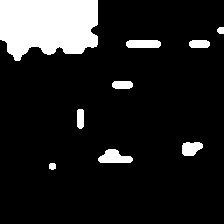

Image: 00375.png, Prediction: 5, Class: Speed limit 80
Actual Class: 1, Speed limit 30
N


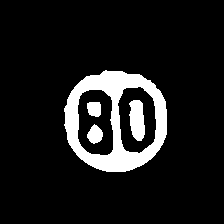

Image: 00373.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


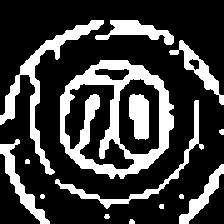

Image: 00383.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


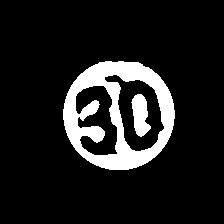

Image: 00378.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


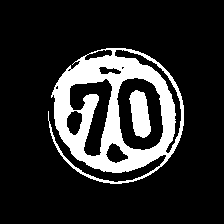

Image: 00390.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


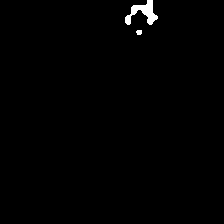

Image: 00393.png, Prediction: 6, Class: Speed limit 100
Actual Class: 2, Speed limit 50
N


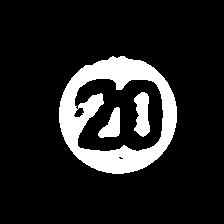

Image: 00403.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


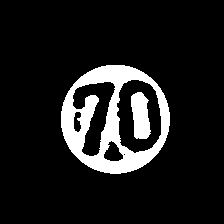

Image: 00398.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


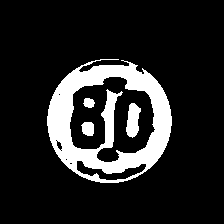

Image: 00408.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


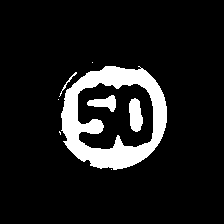

Image: 00419.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


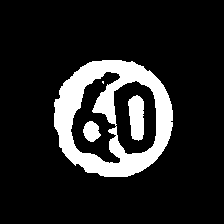

Image: 00420.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


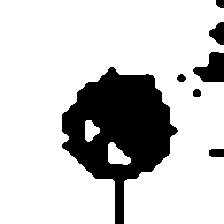

Image: 00421.png, Prediction: 2, Class: Speed limit 50
Actual Class: 4, Speed limit 70
N


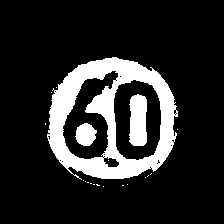

Image: 00472.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


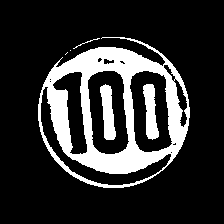

Image: 00469.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


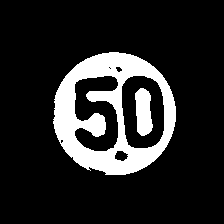

Image: 00481.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


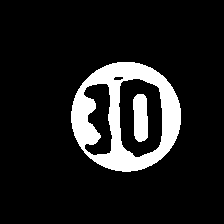

Image: 00473.png, Prediction: 4, Class: Speed limit 70
Actual Class: 1, Speed limit 30
N


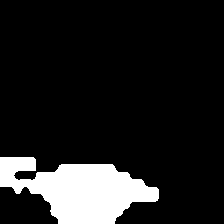

Image: 00495.png, Prediction: 6, Class: Speed limit 100
Actual Class: 5, Speed limit 80
N


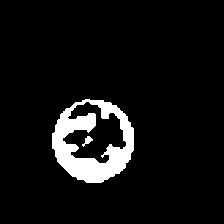

Image: 00484.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


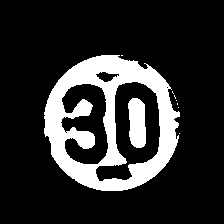

Image: 00508.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


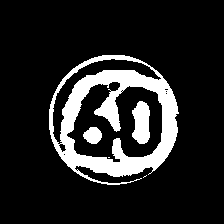

Image: 00509.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


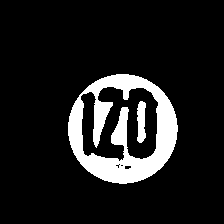

Image: 00510.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


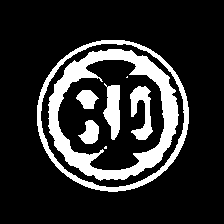

Image: 00024.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


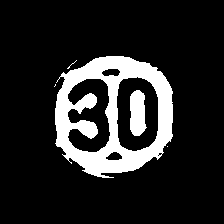

Image: 00091.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


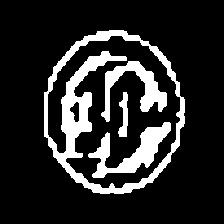

Image: 00118.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


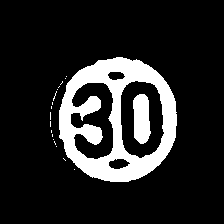

Image: 00128.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


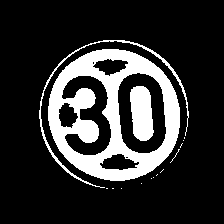

Image: 00290.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


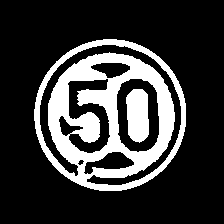

Image: 00409.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


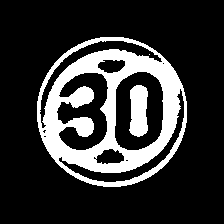

Image: 00864.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


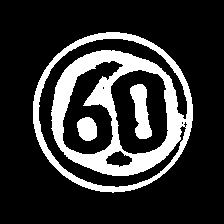

Image: 01007.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


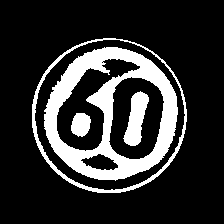

Image: 01118.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


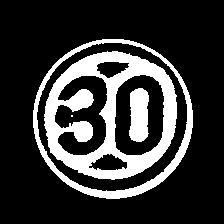

Image: 01226.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


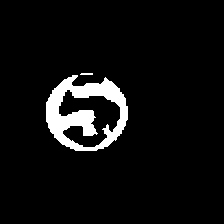

Image: 01358.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


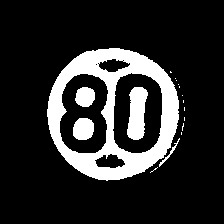

Image: 01645.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


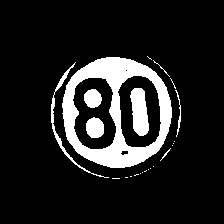

Image: 01940.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


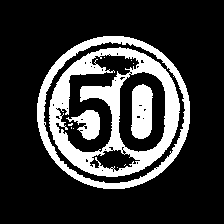

Image: 02594.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


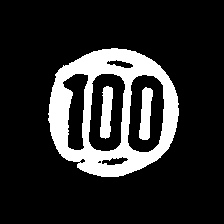

Image: 02892.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


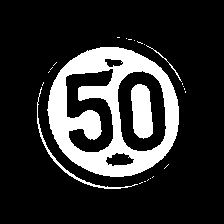

Image: 03110.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


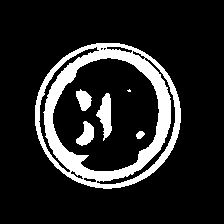

Image: 03135.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


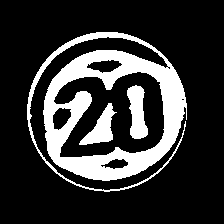

Image: 03420.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


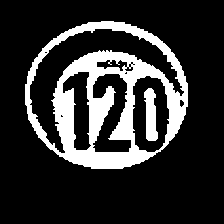

Image: 04488.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


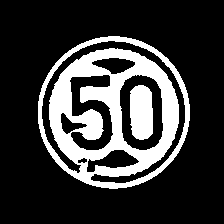

Image: 03451.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


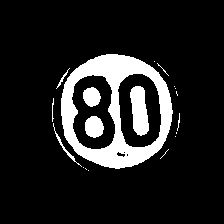

Image: 04559.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


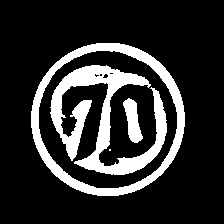

Image: 04493.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


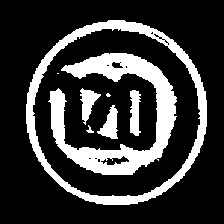

Image: 05396.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


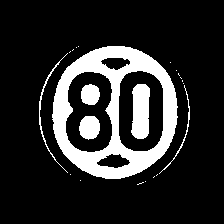

Image: 05598.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


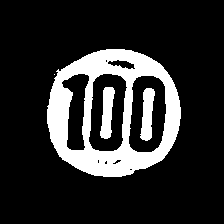

Image: 07162.png, Prediction: 6, Class: Speed limit 100
Actual Class: 6, Speed limit 100
Y


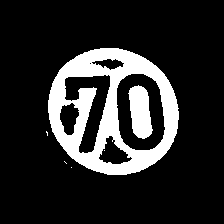

Image: 06367.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


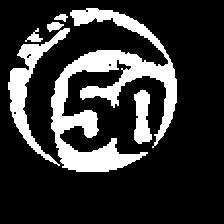

Image: 07296.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


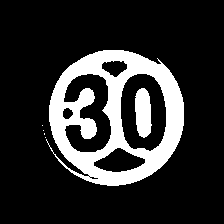

Image: 08536.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


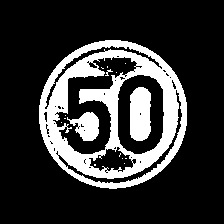

Image: 08256.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


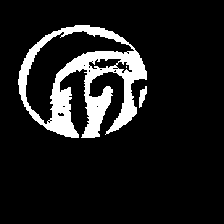

Image: 08745.png, Prediction: 2, Class: Speed limit 50
Actual Class: 7, Speed limit 120
N


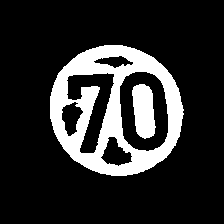

Image: 08814.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


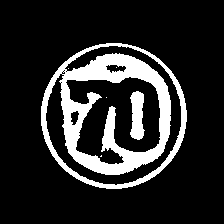

Image: 09605.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


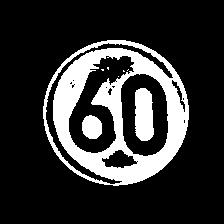

Image: 09112.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


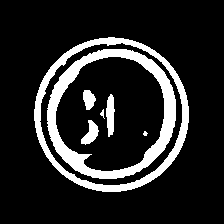

Image: 09028.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30
N


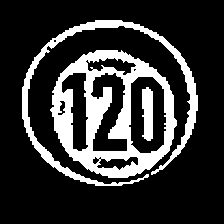

Image: 09764.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


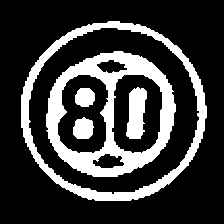

Image: 09900.png, Prediction: 5, Class: Speed limit 80
Actual Class: 5, Speed limit 80
Y


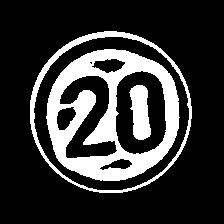

Image: 10049.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


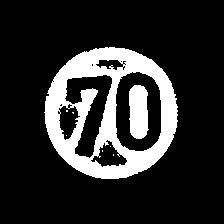

Image: 10071.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


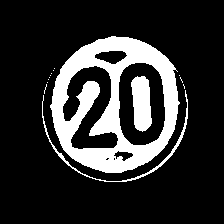

Image: 11771.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


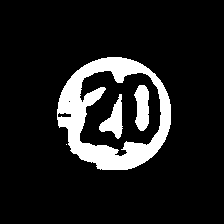

Image: 11790.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


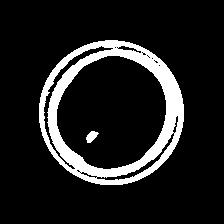

Image: 10841.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30
N


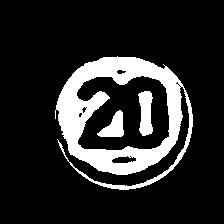

Image: 11804.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


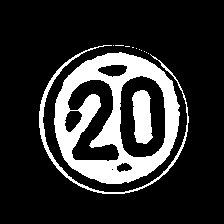

Image: 11873.png, Prediction: 0, Class: Speed limit 20
Actual Class: 0, Speed limit 20
Y


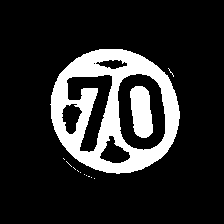

Image: 12272.png, Prediction: 4, Class: Speed limit 70
Actual Class: 4, Speed limit 70
Y


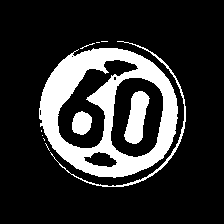

Image: 12442.png, Prediction: 3, Class: Speed limit 60
Actual Class: 3, Speed limit 60
Y


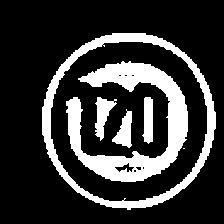

Image: 12273.png, Prediction: 7, Class: Speed limit 120
Actual Class: 7, Speed limit 120
Y


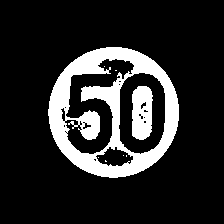

Image: 12565.png, Prediction: 2, Class: Speed limit 50
Actual Class: 2, Speed limit 50
Y


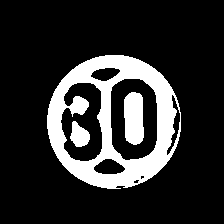

Image: 00001.png, Prediction: 1, Class: Speed limit 30
Actual Class: 1, Speed limit 30
Y


In [ ]:
path = '/content/gdrive/MyDrive/RecogSign/Test/PP_Test/'
correct = 0
total = len(test_images)
for image_path in test_images:
  image = cv2.imread(path + image_path)
  cv2_imshow(image)

  image_fromarray = Image.fromarray(image)
  resize_image = image_fromarray.resize((height, width))
  test_image = np.array(resize_image)
  test_image = test_image.reshape(1, 32, 32, 3)
  pred = model.predict_classes(test_image)
  
  print(f"Image: {image_path}, Prediction: {pred[0]}, Class: {classes[pred[0]]}")
  actual_pred = test_df[test_df['Path']==image_path]['ClassId']
  print(f"Actual Class: {actual_pred.iloc[0]}, {classes[actual_pred.iloc[0]]}")
  if actual_pred.iloc[0]==pred[0]:
    correct+=1
    print("Y")
  else:
    print("N")

In [ ]:
print(f"Correctly Classified: {correct}")
print(f"Accuracy: {correct/total*100}")

Correctly Classified: 129
Accuracy: 84.86842105263158


In [ ]:
##model paths
MODEL_JSON_PATH = '/content/gdrive/MyDrive/RecogSign/model.json'
MODEL_WEIGHTS_PATH = '/content/gdrive/MyDrive/RecogSign/model.f5'

In [ ]:
## SAVING THE MODEL
MODEL_JSON_PATH = '/content/gdrive/MyDrive/RecogSign/model.json'
MODEL_WEIGHTS_PATH = '/content/gdrive/MyDrive/RecogSign/model.f5'

# serialize model to JSON
model_json = model.to_json()
with open(MODEL_JSON_PATH, "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(MODEL_WEIGHTS_PATH)
print("Saved model to disk")

NameError: ignored

In [ ]:
## LOADING SAVED MODEL
MODEL_JSON_PATH = '/content/gdrive/MyDrive/RecogSign/model.json'
MODEL_WEIGHTS_PATH = '/content/gdrive/MyDrive/RecogSign/model.f5'

from keras.models import model_from_json

json_file = open(MODEL_JSON_PATH, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(MODEL_WEIGHTS_PATH)
print("Loaded model from disk")

Loaded model from disk


In [ ]:
## TESTING SAVED MODEL
pred = loaded_model.predict_classes(X_test)

#Accuracy with the test data
print("Accuracy: ", accuracy_score(labels, pred))

Accuracy:  0.8486842105263158


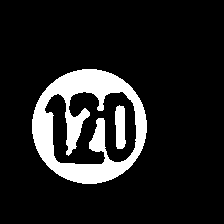

N
Image: 00049.png, Prediction: 5, Class: Speed limit 80
Actual Class: 7, Speed limit 120


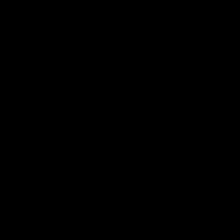

N
Image: 00056.png, Prediction: 4, Class: Speed limit 70
Actual Class: 5, Speed limit 80


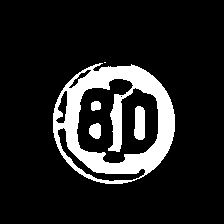

N
Image: 00068.png, Prediction: 1, Class: Speed limit 30
Actual Class: 5, Speed limit 80


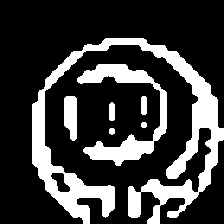

N
Image: 00083.png, Prediction: 7, Class: Speed limit 120
Actual Class: 6, Speed limit 100


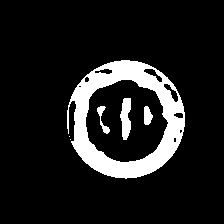

N
Image: 00122.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30


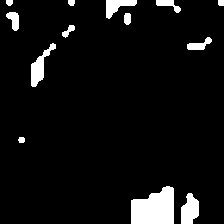

N
Image: 00138.png, Prediction: 1, Class: Speed limit 30
Actual Class: 2, Speed limit 50


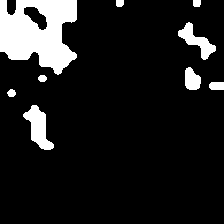

N
Image: 00176.png, Prediction: 7, Class: Speed limit 120
Actual Class: 3, Speed limit 60


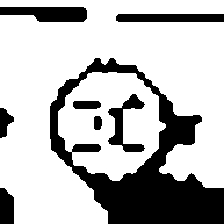

N
Image: 00175.png, Prediction: 5, Class: Speed limit 80
Actual Class: 1, Speed limit 30


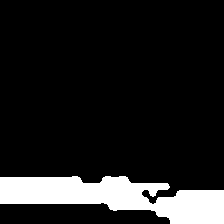

N
Image: 00246.png, Prediction: 6, Class: Speed limit 100
Actual Class: 5, Speed limit 80


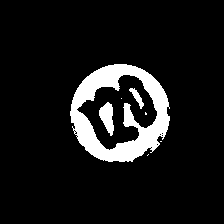

N
Image: 00247.png, Prediction: 5, Class: Speed limit 80
Actual Class: 7, Speed limit 120


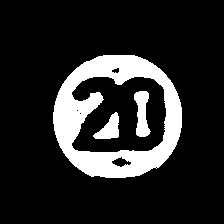

N
Image: 00252.png, Prediction: 5, Class: Speed limit 80
Actual Class: 0, Speed limit 20


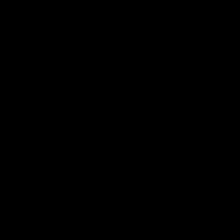

N
Image: 00268.png, Prediction: 4, Class: Speed limit 70
Actual Class: 2, Speed limit 50


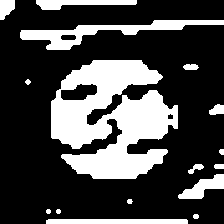

N
Image: 00279.png, Prediction: 6, Class: Speed limit 100
Actual Class: 1, Speed limit 30


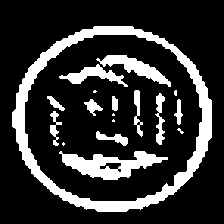

N
Image: 00328.png, Prediction: 6, Class: Speed limit 100
Actual Class: 7, Speed limit 120


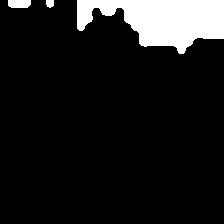

N
Image: 00330.png, Prediction: 3, Class: Speed limit 60
Actual Class: 4, Speed limit 70


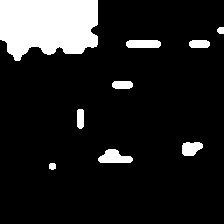

N
Image: 00375.png, Prediction: 5, Class: Speed limit 80
Actual Class: 1, Speed limit 30


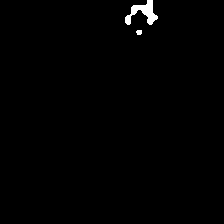

N
Image: 00393.png, Prediction: 6, Class: Speed limit 100
Actual Class: 2, Speed limit 50


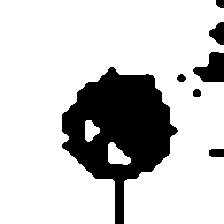

N
Image: 00421.png, Prediction: 2, Class: Speed limit 50
Actual Class: 4, Speed limit 70


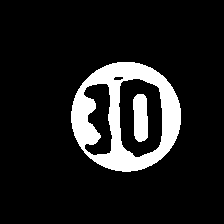

N
Image: 00473.png, Prediction: 4, Class: Speed limit 70
Actual Class: 1, Speed limit 30


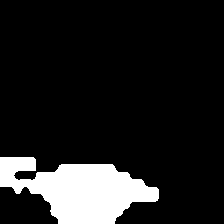

N
Image: 00495.png, Prediction: 6, Class: Speed limit 100
Actual Class: 5, Speed limit 80


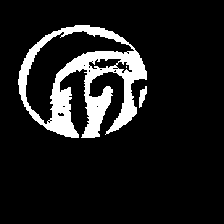

N
Image: 08745.png, Prediction: 2, Class: Speed limit 50
Actual Class: 7, Speed limit 120


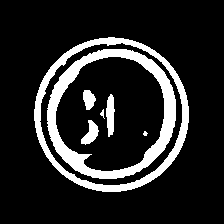

N
Image: 09028.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30


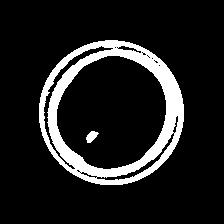

N
Image: 10841.png, Prediction: 2, Class: Speed limit 50
Actual Class: 1, Speed limit 30
23


In [ ]:
path = '/content/gdrive/MyDrive/RecogSign/Test/PP_Test/'
correct = 0
total = len(test_images)
for image_path in test_images:
  image = cv2.imread(path + image_path)
  # cv2_imshow(image)

  image_fromarray = Image.fromarray(image)
  resize_image = image_fromarray.resize((height, width))
  test_image = np.array(resize_image)
  test_image = test_image.reshape(1, 32, 32, 3)
  pred = loaded_model.predict_classes(test_image)
  
  # print(f"Image: {image_path}, Prediction: {pred[0]}, Class: {classes[pred[0]]}")
  # actual_pred = test_df[test_df['Path']==image_path]['ClassId']
  # print(f"Actual Class: {actual_pred.iloc[0]}, {classes[actual_pred.iloc[0]]}")
  actual_pred = test_df[test_df['Path']==image_path]['ClassId']

  if actual_pred.iloc[0]==pred[0]:
    correct+=1
    # print("Y")
  else:
    cv2_imshow(image)
    print("N")
    print(f"Image: {image_path}, Prediction: {pred[0]}, Class: {classes[pred[0]]}")

    print(f"Actual Class: {actual_pred.iloc[0]}, {classes[actual_pred.iloc[0]]}")

print(total-correct)

In [ ]:
import numpy as np, pandas as pd
import cv2
from tqdm import tqdm_notebook, tqdm # Iteration visualization
tqdm.pandas(desc="Loading") # to do progress_apply for pandas

In [ ]:
!ls /content/gdrive/MyDrive/RecogSign/Annotations/

annotClass0.csv     annotClass2.csv  annotClass5.csv
annotClass1.csv     annotClass3.csv  annotClass7.csv
annotClass1.gsheet  annotClass4.csv  annotClass8.csv


In [ ]:
for i in range(8):

  ANNOTATION_PATH2 = f'/content/gdrive/MyDrive/RecogSign/YOLO_Format/{i}'
  print(f'Folder {i}:', len(os.listdir(ANNOTATION_PATH2)))

Folder 0: 210
Folder 1: 2219
Folder 2: 2249
Folder 3: 1410
Folder 4: 1979
Folder 5: 1859
Folder 6: 1439
Folder 7: 2848


In [ ]:
def convert(size, box):
  dw = 1./size[0]
  dh = 1./size[1]
  x = (box[0] + box[1])/2.0
  y = (box[2] + box[3])/2.0
  w = box[1] - box[0]
  h = box[3] - box[2]
  x = x*dw
  w = w*dw
  y = y*dh
  h = h*dh
  return (x,y,w,h)

ANNOTATION_PATH = '/content/gdrive/MyDrive/RecogSign/Annotations/'
OUTPUT_YOLO = '/content/gdrive/MyDrive/RecogSign/YOLO_Format/'

print(os.listdir(ANNOTATION_PATH))
for f in os.listdir(ANNOTATION_PATH):
  print(f)
  if f[-6:]=='gsheet':
    continue
  df = pd.read_csv(ANNOTATION_PATH + f)
  cls = int(f[-5])
  print(f"Class read: {cls}")

  ## cheap fix
  if cls == 7:
    cls = 6
  elif cls ==8:
    cls = 7
  print(f"Class final: {cls}")
  for index, item in df.iterrows():
    if pd.isna(item['filename']):
      continue
    image_path = item['filename'][:-4]
    # print(f"{OUTPUT_YOLO}{cls}/{image_path}.txt")
    fout = open(f"{OUTPUT_YOLO}{image_path}.txt", "w")
    w = 224
    h = 224
    size = (w,h)
    xmin = item['xmin'] if item['xmin']>=0 else 0
    ymin = item['ymin'] if item['ymin']>=0 else 0
    box = (xmin, ymin, item['xmax'], item['ymax'])
    bb = convert(size, box)
    # print(bb)
    ncls = str(cls)
    fout.write(ncls + " " + " ".join([str(a) for a in bb]) + '\n')
    fout.close()
  print(f"Data written for class {cls}\n")
print("all done")

['annotClass0.csv', 'annotClass1.csv', 'annotClass2.csv', 'annotClass3.csv', 'annotClass4.csv', 'annotClass5.csv', 'annotClass6.csv', 'annotClass7.csv']
annotClass0.csv
Class read: 0
Class final: 0
Data written for class 0

annotClass1.csv
Class read: 1
Class final: 1
Data written for class 1

annotClass2.csv
Class read: 2
Class final: 2
Data written for class 2

annotClass3.csv
Class read: 3
Class final: 3
Data written for class 3

annotClass4.csv
Class read: 4
Class final: 4
Data written for class 4

annotClass5.csv
Class read: 5
Class final: 5
Data written for class 5

annotClass6.csv
Class read: 6
Class final: 6
Data written for class 6

annotClass7.csv
Class read: 7
Class final: 6
Data written for class 6

all done


In [ ]:
TRAIN_TEXT_FILE = '/content/gdrive/MyDrive/RecogSign/train.txt'
VAL_TEXT_FILE = '/content/gdrive/MyDrive/RecogSign/val.txt'
TRAIN_IMAGES_PATH_OLD = '/content/gdrive/MyDrive/RecogSign/NewPreprocessed/' ##for getting image file names
TRAIN_IMAGES_PATH_NEW = 'data/images/'

image_data = []

ftrain = open(TRAIN_TEXT_FILE, 'w')
fval = open(VAL_TEXT_FILE, "w")

for folder in os.listdir(TRAIN_IMAGES_PATH_OLD):
  for image_file in os.listdir(TRAIN_IMAGES_PATH_OLD + folder):
    path_to_be_written = TRAIN_IMAGES_PATH_NEW + image_file
    # print(path_to_be_written)
    image_data.append(path_to_be_written)
  print(f'Done for folder {folder}')

import random

random.shuffle(image_data)
idx = int(0.8 * len(image_data)) #80% for training
print(idx)

train_data = image_data[:idx]
test_data = image_data[idx:]

for item in train_data:
  ftrain.write(item+"\n")
print("Train written")
ftrain.close()

for item in test_data:
  fval.write(item+"\n")
print("Val written")
fval.close()

print('All done')



Done for folder 3
Done for folder 0
Done for folder 1
Done for folder 2
Done for folder 4
Done for folder 5
Done for folder 6
Done for folder 7
8140
Train written
Val written
All done


In [ ]:
print(os.listdir('/content/gdrive/MyDrive/RecogSign/'))

['Meta.csv', 'Test.csv', 'Train.csv', 'Meta', 'Train', 'Preprocessed', 'Test', 'NewPreprocessed', 'model.f5.data-00000-of-00001', 'model.f5.index', 'checkpoint', 'model.json', 'Annotations', 'YOLO_Format', 'Resized', 'train.txt']


In [ ]:
f = open(TRAIN_TEXT_FILE, 'r')
print(f.readlines())

['data/images/00001_00027_00010.png\n', 'data/images/00001_00066_00002.png\n', 'data/images/00004_00034_00022.png\n', 'data/images/00004_00062_00008.png\n', 'data/images/00002_00020_00003.png\n', 'data/images/00002_00025_00028.png\n', 'data/images/00000_00006_00016.png\n', 'data/images/00008_00037_00029.png\n', 'data/images/00003_00020_00025.png\n', 'data/images/00004_00038_00014.png\n', 'data/images/00003_00004_00000.png\n', 'data/images/00004_00060_00021.png\n', 'data/images/00002_00050_00016.png\n', 'data/images/00007_00020_00006.png\n', 'data/images/00002_00007_00007.png\n', 'data/images/00007_00014_00009.png\n', 'data/images/00005_00004_00010.png\n', 'data/images/00003_00037_00020.png\n', 'data/images/00002_00048_00013.png\n', 'data/images/00004_00029_00016.png\n', 'data/images/00004_00054_00013.png\n', 'data/images/00001_00041_00028.png\n', 'data/images/00003_00021_00015.png\n', 'data/images/00007_00017_00015.png\n', 'data/images/00005_00014_00021.png\n', 'data/images/00002_00060

In [ ]:
f = open(VAL_TEXT_FILE, 'r')
print(f.readlines())

['data/images/00001_00026_00025.png\n', 'data/images/00001_00020_00017.png\n', 'data/images/00005_00047_00001.png\n', 'data/images/00001_00030_00011.png\n', 'data/images/00008_00038_00019.png\n', 'data/images/00003_00041_00029.png\n', 'data/images/00001_00060_00026.png\n', 'data/images/00000_00004_00006.png\n', 'data/images/00008_00023_00022.png\n', 'data/images/00002_00074_00027.png\n', 'data/images/00002_00032_00027.png\n', 'data/images/00003_00014_00022.png\n', 'data/images/00008_00045_00012.png\n', 'data/images/00002_00021_00023.png\n', 'data/images/00008_00009_00012.png\n', 'data/images/00003_00016_00029.png\n', 'data/images/00001_00056_00017.png\n', 'data/images/00002_00024_00020.png\n', 'data/images/00005_00023_00018.png\n', 'data/images/00004_00042_00005.png\n', 'data/images/00004_00059_00011.png\n', 'data/images/00008_00022_00017.png\n', 'data/images/00001_00068_00016.png\n', 'data/images/00003_00040_00012.png\n', 'data/images/00003_00028_00020.png\n', 'data/images/00003_00017

In [ ]:
print(len(os.listdir('/content/gdrive/MyDrive/RecogSign/Resized/Resized5')))

781


In [ ]:
!unzip /content/gdrive/MyDrive/RecogSign/darknet.zip

unzip:  cannot find or open /content/gdrive/MyDrive/RecogSign/darknet.zip, /content/gdrive/MyDrive/RecogSign/darknet.zip.zip or /content/gdrive/MyDrive/RecogSign/darknet.zip.ZIP.


In [ ]:
%cd /content/gdrive/MyDrive/RecogSign/darknet
# !make
# !chmod +x ./darknet

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/RecogSign/darknet'
/content


In [ ]:
!ls /content/gdrive/MyDrive/RecogSign/

 Annotations	    Meta.csv			   Test.csv
 backup		    model.f5.data-00000-of-00001   Train
 checkpoint	    model.f5.index		   Train.csv
 darknet	    model.json			   train.txt
 darknet1	    NewPreprocessed		   val.txt
'darknet (1).zip'   Preprocessed		   YOLO_Format
 darknet.zip	    Resized
 Meta		    Test


In [ ]:
!ls /content/gdrive/MyDrive/RecogSign/darknet1/darknet/data/images/

In [ ]:
# open both files 

base_folder = '/content/gdrive/MyDrive/RecogSign/YOLO_Format/'
dest_folder = '/content/gdrive/MyDrive/RecogSign/darknet1/darknet/data/labels/'

for filen in os.listdir(base_folder):
  dest_path = dest_folder + filen
  src = open(base_folder + filen, 'r')
  dest = open(dest_folder + filen, 'w') 
  for line in src:
    dest.write(line)
print("done")

done


In [ ]:
import os
print(len(os.listdir('/content/gdrive/MyDrive/RecogSign/darknet1/darknet/data/images/')))

NameError: ignored